ПИН-б-з-19-1, Диденко Мария





In [ ]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
def true_fun(x, a=np.pi, b = 0, f=np.sin):
 x = np.atleast_1d(x)[:]
 a = np.atleast_1d(a)
 if f is None: f = lambda x:x
 x = np.sum([ai*np.power(x, i+1) for i,ai in enumerate(a)],
axis=0)
 return f(x+ b)

In [ ]:
def noises(shape , noise_power):
 return np.random.randn(*shape) *noise_power

In [ ]:
def dataset(a, b, f = None, N = 250, x_max =1, noise_power
= 0, random_x = True, seed = 42):
 np.random.seed(seed)

 if random_x:
   x = np.sort(np.random.rand(N))*x_max
 else:
   x = np.linspace(0,x_max,N)

 y_true = np.array([])

 for f_ in np.append([], f):
   y_true=np.append(y_true, true_fun(x, a, b, f_))

 y_true = y_true.reshape(-1,N).T
 y = y_true + noises(y_true.shape , noise_power)
 return y, y_true, np.atleast_2d(x).T

In [ ]:
def vis_data(y, y_true,x, title):
    fig  = plt.figure(figsize=(15,10))
    plt.scatter(x[:,0], y, edgecolor='b', label="Зашумленные Данные",s=196, alpha = 0.6)
    plt.scatter(x[:,0], y_true,label="Реальные Данные", s=81,c='g', alpha = 0.8)
    plt.grid()
    plt.xlabel('x',fontsize=35)
    plt.ylabel('y',fontsize=35)
    plt.legend(fontsize=25)
    plt.title(title, fontsize=25)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25);
    plt.tight_layout()

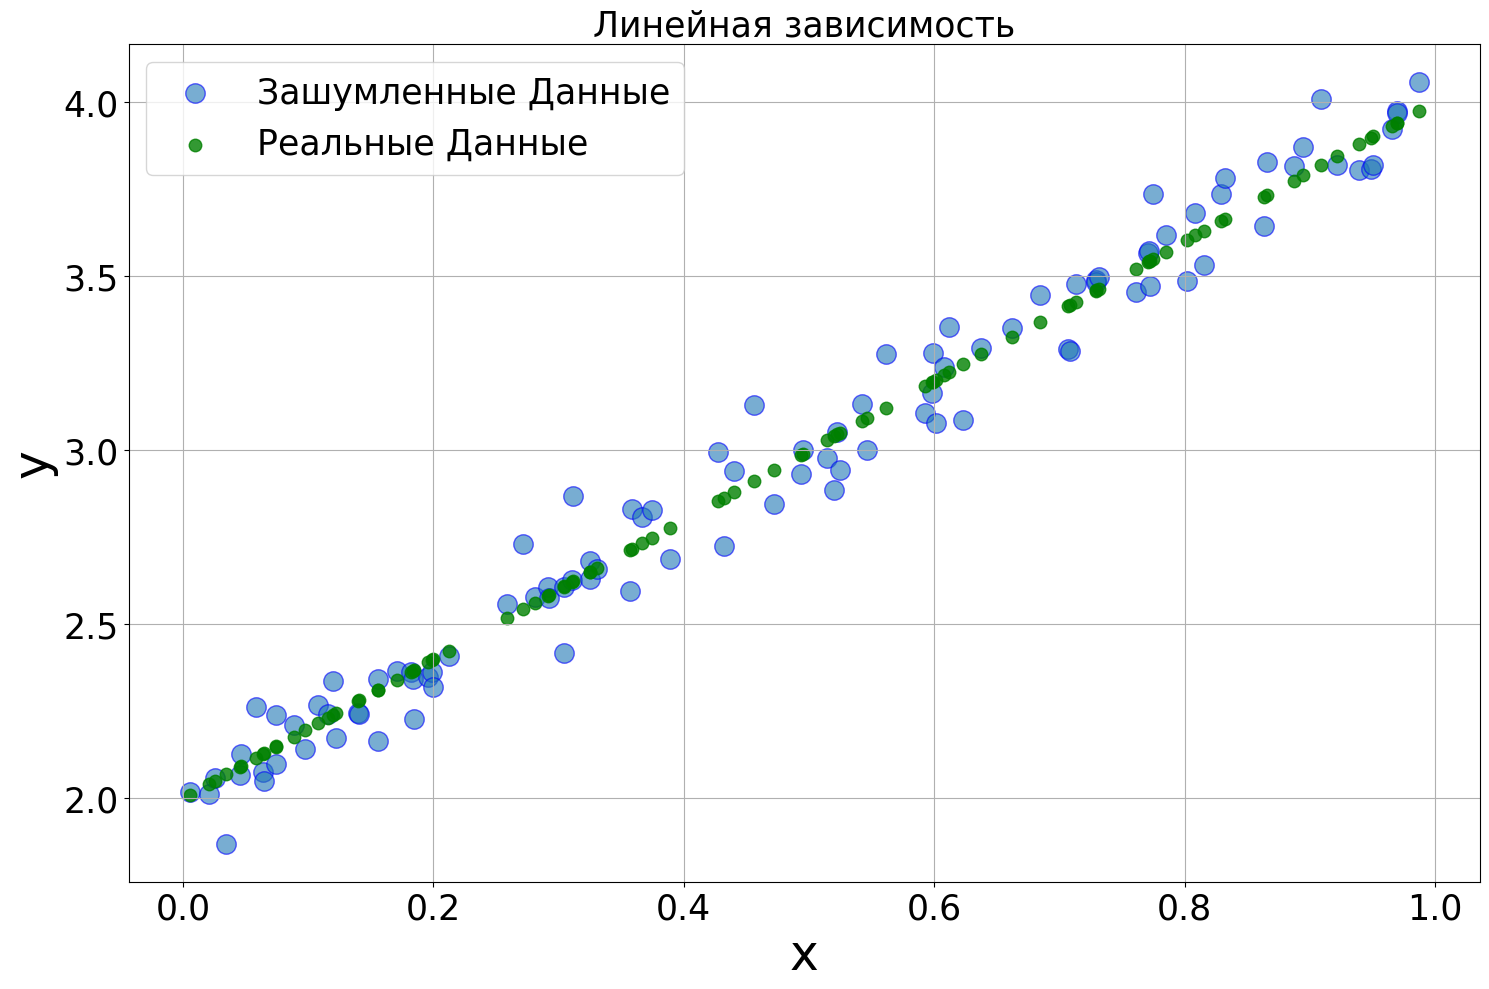

In [ ]:
y, y_true, x = dataset(a = 2, b = 2, f = None, N = 100, x_max =1, noise_power = 0.1, seed = 42)
vis_data(y, y_true,x, 'Линейная зависимость')

In [ ]:
y, y_true, x = dataset(a = [-1,2,-2], b = -1, f = None, N = 250, x_max =1.25, noise_power = 0.05, seed = 42)

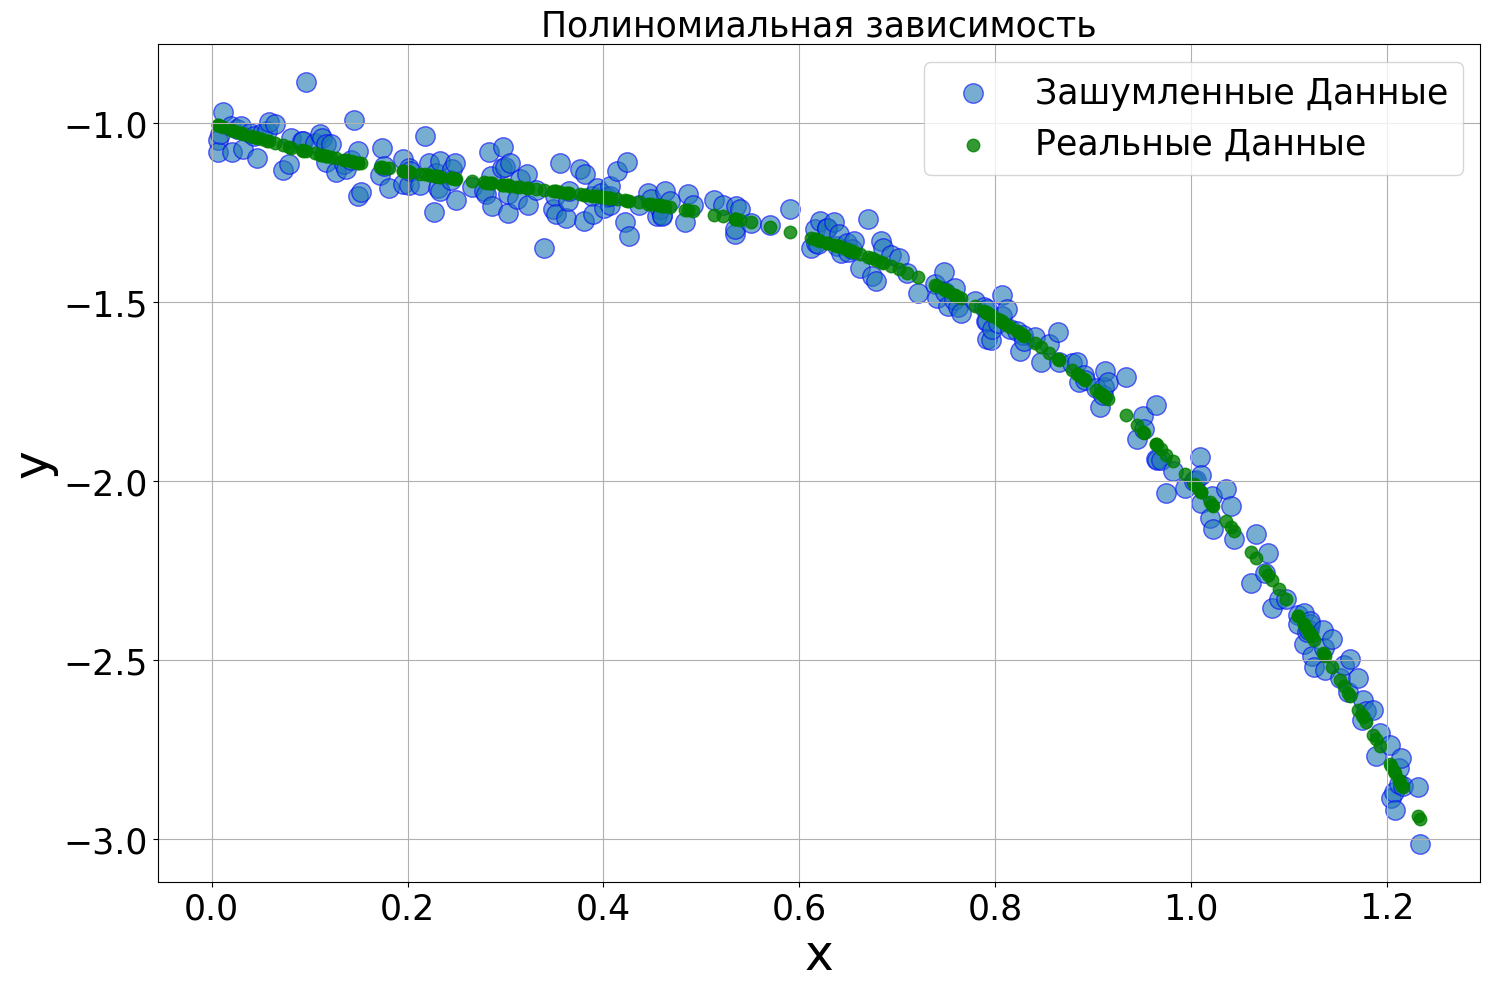

In [ ]:
vis_data(y, y_true,x, 'Полиномиальная зависимость')

In [ ]:
y, y_true, x = dataset(a = 3*np.pi,b = 0, f = np.cos, N = 25, x_max =np.pi/4, noise_power = 0.1, seed = 42)

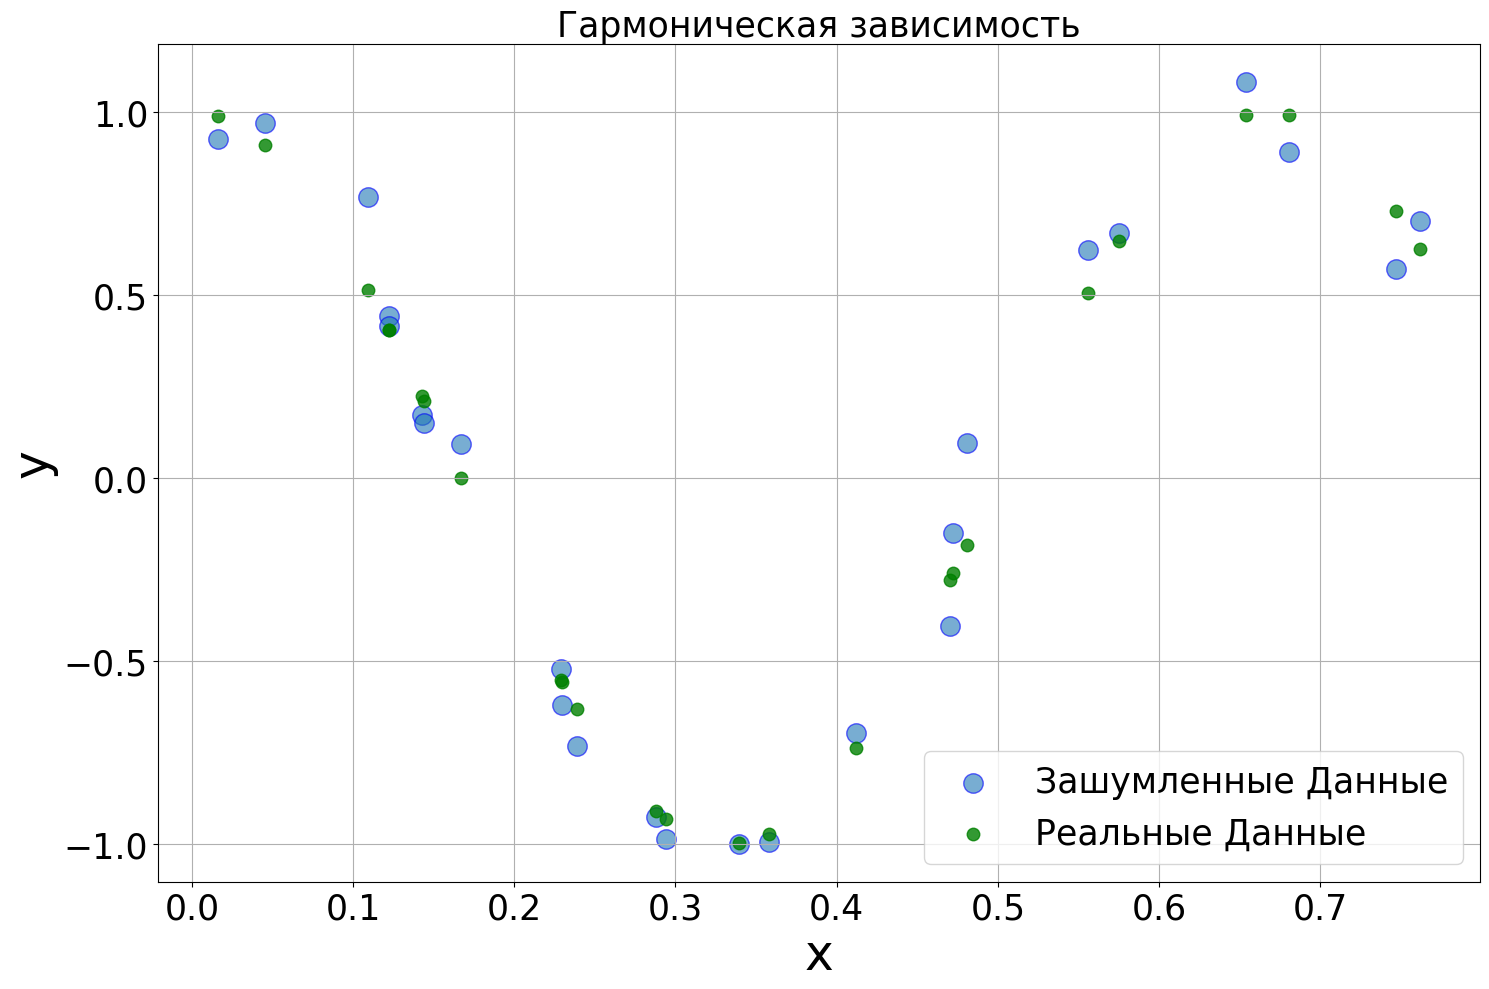

In [ ]:
vis_data(y, y_true,x, 'Гармоническая зависимость')

In [ ]:
def predict( X, weights, add_bias = True):
 if add_bias:
   X_full = np.column_stack((np.ones(X.shape[0]),X))
 else:
   X_full = X
 return np.dot(X_full, weights)

In [ ]:
def loss_func(yhat, y):
 return np.square(yhat - y)

In [ ]:
def train_test_split(x,y, train_size=None, test_size=None, random_state=42, shuffle=True,):
    if random_state: np.random.seed(random_state)

    size = y.shape[0]
    idxs = np.arange(size)
    if shuffle: np.random.shuffle(idxs)

    if test_size and train_size is None:
        if (test_size<= 1):  train_size = 1 - test_size
        else:  train_size = size - test_size
        test_size = None

    if train_size is None or train_size > size: train_size = size

    if (train_size<= 1): train_size *= size

    if test_size is not None:
        if test_size<= 1: test_size *= size
        if test_size>size: test_size = size-train_size
    else: test_size = 0

    x_train, y_train = x[idxs[:int(train_size)]], y[idxs[:int(train_size)]]
    x_val,   y_val   = x[idxs[int(train_size):size - int(test_size)]], y[idxs[int(train_size):size - int(test_size)]]

    if test_size > 0:
        x_test, y_test = x[idxs[size - int(test_size):]], y[idxs[size - int(test_size):]]
        return x_train, y_train.squeeze(), x_val, y_val.squeeze(), x_test, y_test.squeeze()
    return x_train, y_train.squeeze(), x_val, y_val.squeeze()


x_train, y_train, x_val, y_val, x_test, y_test = train_test_split(x, y, train_size = 0.5, test_size=0.3, )
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape,  x_test.shape, y_test.shape )


x_train, y_train,  x_test, y_test = train_test_split(x, y,  test_size=0.3, )
print(x_train.shape, y_train.shape,  x_test.shape, y_test.shape )

(12, 1) (12,) (6, 1) (6,) (7, 1) (7,)
(17, 1) (17,) (8, 1) (8,)


In [ ]:
x_train, y_train,  x_test, y_test = train_test_split(x, y,  test_size=0.3, )
print(x_train.shape, y_train.shape,  x_test.shape, y_test.shape )


(17, 1) (17,) (8, 1) (8,)


In [ ]:
x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=0.3, )

In [ ]:
def init_weights(W_shape, add_bias = True, random_state = 42):
    W_shape = np.atleast_1d(W_shape)
    if random_state:
        np.random.seed(random_state)
    W = np.random.randn(*list(W_shape))/np.sqrt(np.sum(W_shape))
    if add_bias:
        W = np.column_stack((np.zeros(W.shape[-1]),W ))
    return W.squeeze()

In [ ]:
weights = init_weights(x.shape[1])
yhat = predict( x_train[0],weights)
loss = loss_func(yhat, y[0])

In [ ]:
def grad_loss(y_hat, y, X, add_bias = True):
    if add_bias:
        X_full = np.column_stack((np.ones(X.shape[0]),X))
    else:
        X_full = X
    return 2*np.dot(X_full.T, (y_hat - y)) / y.size

In [ ]:
grad = grad_loss(yhat, y[0], x[0])
print(grad)

[-1.62370541 -0.02625048]


In [ ]:
def update_weights(grad, weights, learning_rate):
 return weights - learning_rate*grad

In [ ]:
weights = update_weights(grad, weights, 0.1)

In [ ]:
def fit(X, y, learning_rate, weights = None,  epochs=30):

    if weights is None: weights = init_weights(X.shape[1])
    cost    = np.zeros(epochs)

    for i in range(epochs):
        yhat    = predict(X,weights)
        grad    = grad_loss(yhat,  y, X)
        weights = update_weights(grad, weights, learning_rate)
        cost[i] = loss_func(yhat,  y).mean()

    return weights, cost

In [ ]:
weights, cost = fit(x_train, y_train, learning_rate=0.1, epochs=25)

In [ ]:
def plot_cost(cost):
    plt.plot(cost, 'o-', linewidth = 4, markersize = 15);
    plt.grid()
    plt.xlabel("Эпоха",fontsize=35)
    plt.ylabel("Функция Потерь",fontsize=35)
    plt.xticks(fontsize = 25)

    plt.yticks(fontsize = 25);

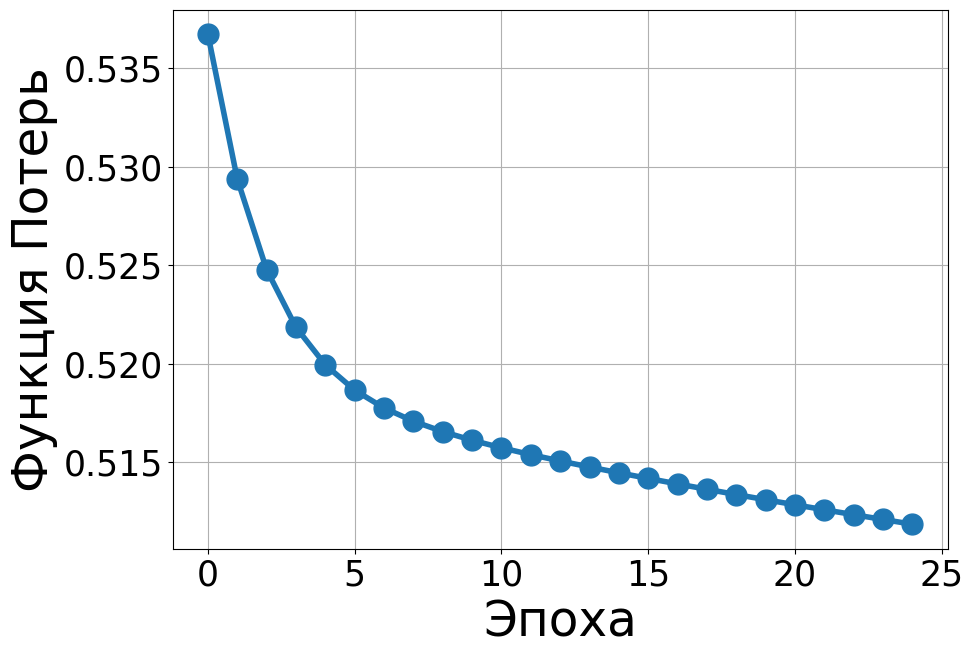

In [ ]:
fig  = plt.figure(figsize=(10,7))

plot_cost(cost)

In [ ]:
def r2_score(yhat, y):
 return 1-(np.square(y-yhat)).sum(axis=0)/(np.square(y-np.mean(y, axis=0))).sum(axis=0)

In [ ]:
predicts = predict( x_test,weights,)

r2_score(predicts, y_test), r2_score(predict(x_train,weights, ), y_train)

(0.11213870371092205, -0.023636797752205174)

In [ ]:
def plot_model_weights(x_train, y_train, x_test, x, y, weights):
    plt.plot(x_train[:,0], predict(x_train,weights, ),
            '.', label='Предсказание на x_train',
            markersize = 15)
    plt.plot(x_test[:,0], predict(x_test,weights, ),
            'o', label='Предсказание на x_test',
            markersize = 15, alpha =0.8)
    plt.plot(x_train[:,0], y_train, '.',
            label="Тренировочные данные", linewidth=2,c='r')
    plt.plot(x[:,0], y, '--',
            label="Истинные Значения", linewidth=4,c='g')
    plt.legend(fontsize=20); plt.grid()
    plt.xlabel('x',fontsize=35)
    plt.ylabel('y',fontsize=35);
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25);

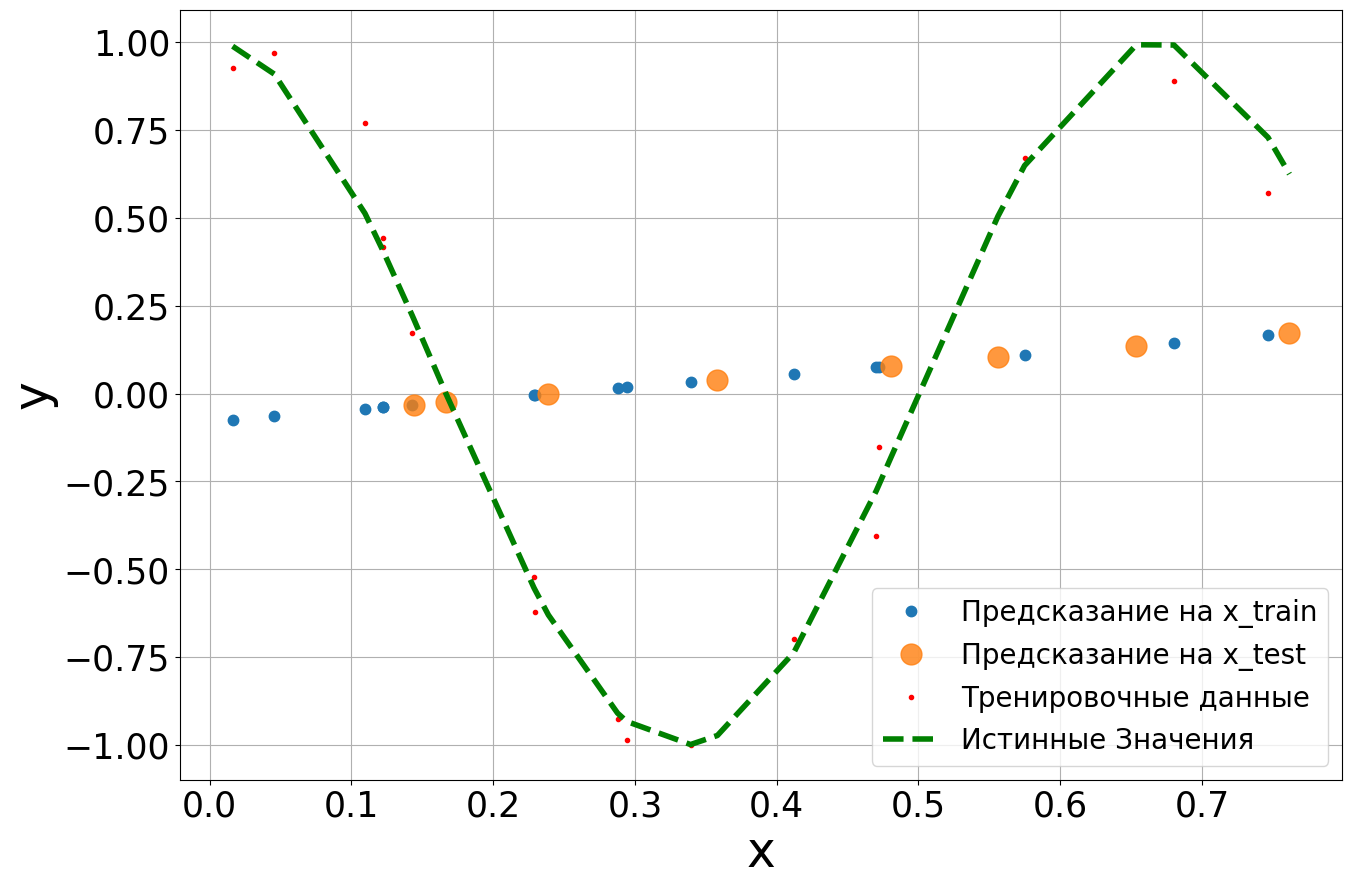

In [ ]:
fig  = plt.figure(figsize=(15,10))

plot_model_weights(x_train, y_train, x_test, x, y_true, weights)

In [ ]:
def load_batch(X,y, batch_size = 100):
    idxs = np.arange(y.size)
    np.random.shuffle(idxs)

    for i_batch in range(0,y.size,batch_size):
        idx_batch = idxs[i_batch:i_batch+batch_size]
        x_batch   = np.take(X, idx_batch,axis=0)
        y_batch   = np.take(y, idx_batch)
        yield  x_batch, y_batch

In [ ]:
BATCH = 10

def fit_SGD(X, y, lerning_rate, weights = None,  epochs=30, batch_size = 100, random_state = 42):

    if random_state: np.random.seed(random_state)

    if weights is None: weights = init_weights(X.shape[1])
    if batch_size is None or batch_size>y.size : batch_size = y.size
    n_batches = y.size//batch_size

    cost    = np.zeros(epochs)

    for i in range(epochs):
        loss = 0
        for cnt,(x_batch, y_batch) in enumerate(load_batch(X,y, batch_size)):

            yhat    = predict(x_batch, weights)
            grad    = grad_loss(yhat,  y_batch, x_batch)
            weights = update_weights(grad, weights, lerning_rate) #backward
            loss   += loss_func(yhat,  y_batch).mean()

            if cnt>= n_batches:
                break
        cost[i] = loss/n_batches

    return weights, cost

In [ ]:
weights = init_weights(x_train.shape[1], random_state=42)

weights, cost = fit_SGD(x_train, y_train, lerning_rate=0.1, batch_size = 10,  epochs=10)

predicts = predict(x_test, weights, )
r2_score(predicts, y_test), r2_score(predict(x_train,weights, ), y_train)

(0.13026233058180336, -0.027611210291075716)

In [ ]:
weights

array([-0.06397962,  0.36202733])

In [ ]:
def vis_weigths(weights):
    numbers = np.arange(0,len(weights))
    tick_labels = ['w'+str(num) for num in numbers]
    cc=['']*len(numbers)
    for n,val in enumerate(weights):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = weights, color = cc)
    plt.xticks(np.arange(0,len(weights)),tick_labels );

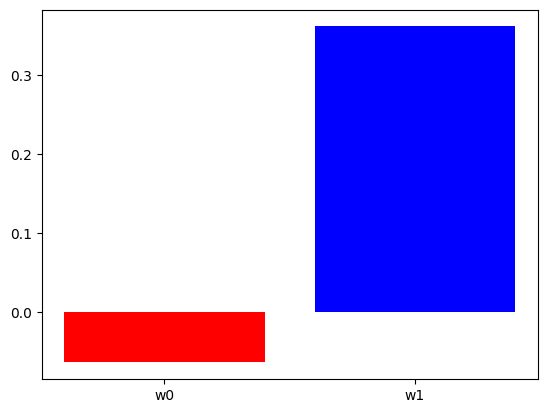

In [ ]:
vis_weigths(weights)

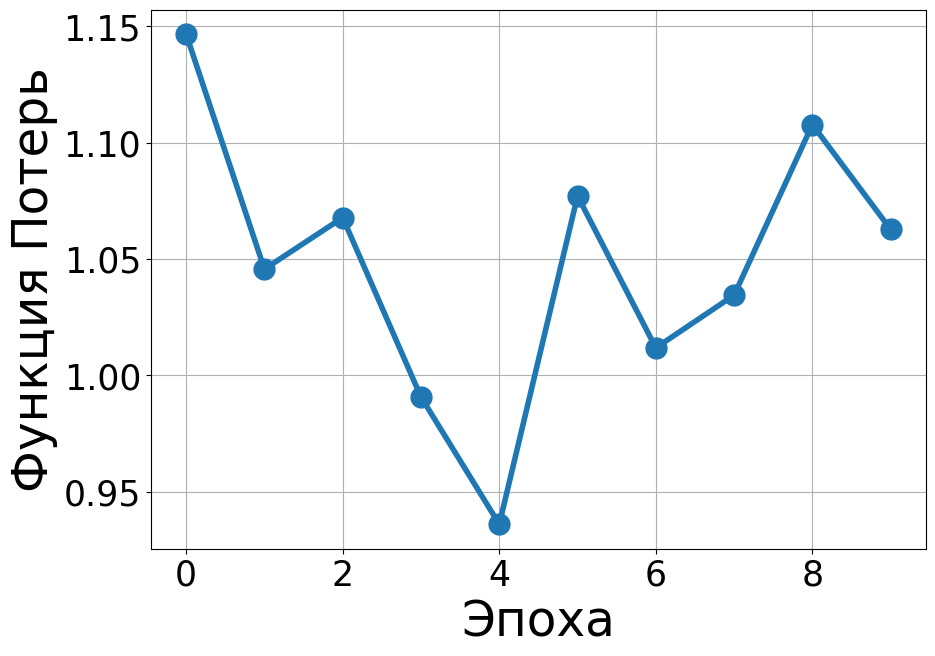

In [ ]:
fig  = plt.figure(figsize=(10,7))

plot_cost(cost)

In [ ]:
class LinearRegression():
    def __init__(self,
                 learning_rate = 0.5,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 n_batches    = None,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)

        self.n_batches = n_batches

        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
                self.weights = np.append(self.bias,self.weights)

    #---------------------------------
    def forward(self, X):
        return np.dot(X, self.weights)

    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size

    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size

    #---------------------------------
    def update(self):
        return self.weights - self.lr*self.grad

    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)

    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat.squeeze()

    #---------------------------------
    def score(self, X, y):
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))

    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)

        if self.weights is None:
            self.weights = self.init(X.shape[1])

        if self.bias is None:
            self.bias    = self.init(1)

        if self.weights.size == X.shape[1]:
            self.weights = np.append(self.bias,self.weights)

        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:
            self.batch_size = y.size

        if self.n_batches is None:
            self.n_batches = y.size//self.batch_size

        for i in range(self.epochs):
            loss = 0
            for cnt,(x_batch, y_batch) in enumerate(self.load_batch(X,y)):

                yhat         = self.forward(x_batch)
                self.grad    = self.grad_step(yhat,  y_batch, x_batch)
                self.weights = self.update()
                loss += self.loss(yhat,  y_batch)

                if cnt>= self.n_batches:
                    break
            self.cost[i] = loss/self.n_batches

        self.bias = self.weights[0]
    #---------------------------------
    def load_batch(self,X,y):
        idxs = np.arange(y.size)
        np.random.shuffle(idxs)

        for i_batch in range(0,y.size,self.batch_size):
            idx_batch = idxs[i_batch:i_batch+self.batch_size]
            x_batch   = np.take(X, idx_batch,axis=0)
            x_batch   = self.add_bias(x_batch)
            y_batch   = np.take(y, idx_batch)
            yield  x_batch, y_batch

    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    #---------------------------------
    def plot_cost(self, figsize = (12,6), title = ''):
        plt.figure(figsize = figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('Эпоха', fontsize = 24)
        plt.ylabel('Функция Потерь', fontsize = 24)
        plt.title(title, fontsize = 24)
        plt.show()

    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

In [ ]:
def to_polynom(X, order = 2):
 order_range = range(order, order+1,1)
 out = np.copy(X)
 for i in order_range:
   out = np.hstack([out, np.power(X,i)])
 return out

In [ ]:
x_ = to_polynom(x, order = 5)
x_train, y_train, x_test, y_test = train_test_split(x_, y, test_size=0.3, )
regr = LinearRegression(learning_rate=0.1,epochs=100,batch_size=10, n_batches=None)
regr.fit(x_train, y_train)

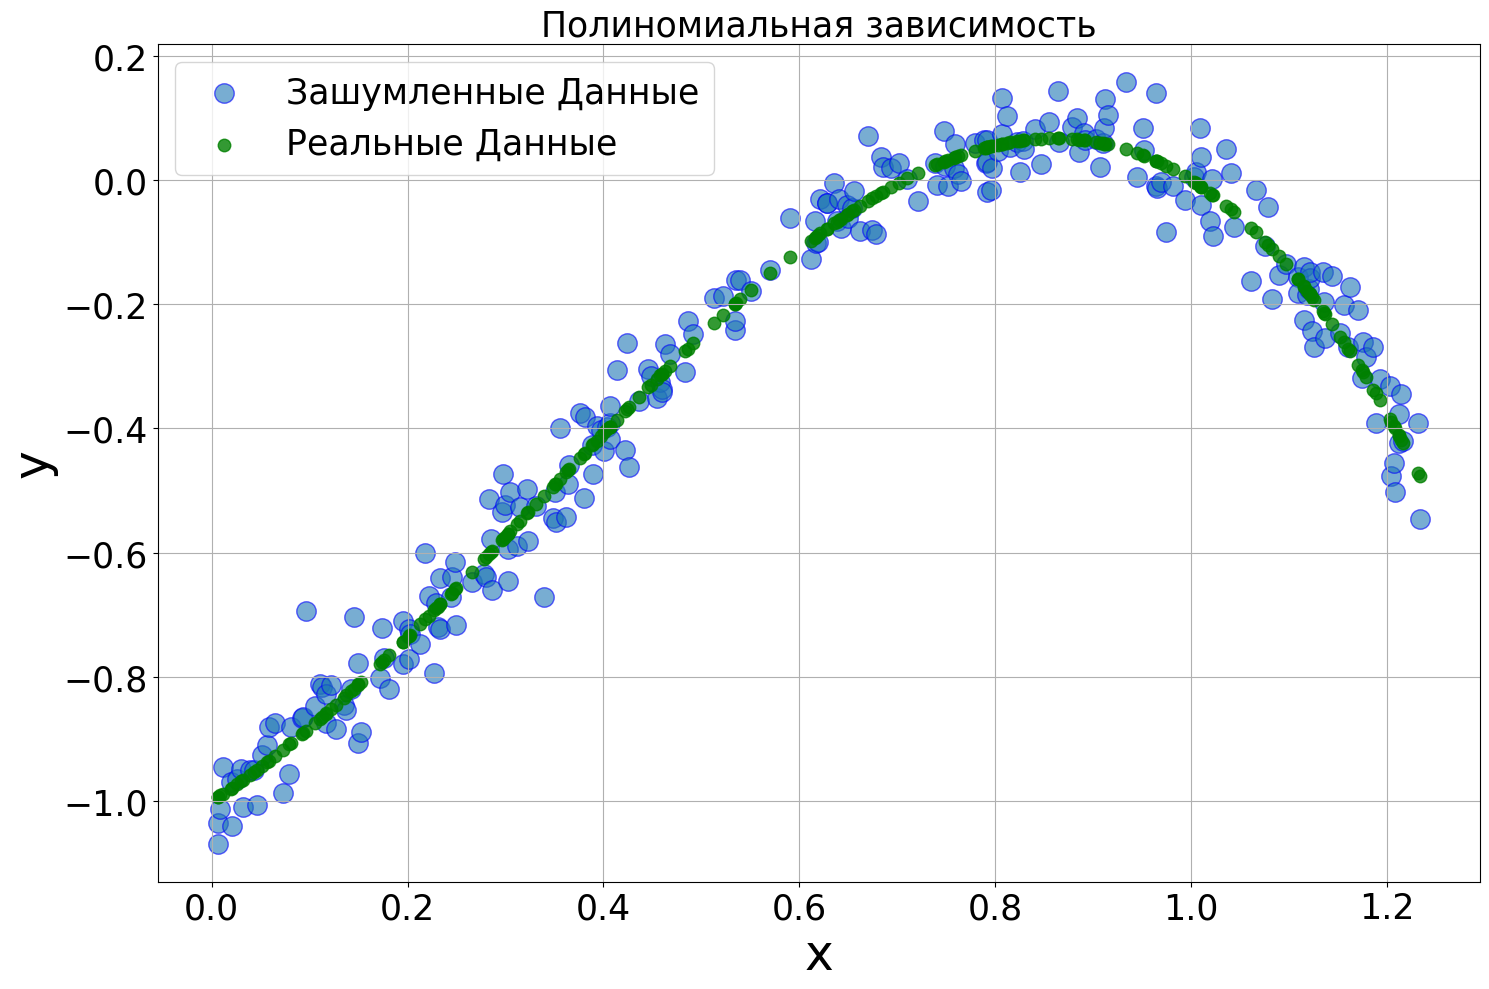

In [ ]:
noise_power = 0.05

y, y_true, x = dataset(a = [1,2,-2], b = -1,
                       f = None,  N = 250,
                       x_max =1.25,
                       noise_power = noise_power,
                       seed = 42)
vis_data(y, y_true,x, 'Полиномиальная зависимость')

In [ ]:
class LassoRegression(LinearRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l1_penalty = 0.001,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 n_batches    = None,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         n_batches    = n_batches,
                         random_state = random_state)
        self.l1_penalty = l1_penalty

    #---------------------------------
    def loss(self,yhat, y):
        l1_term = self.l1_penalty*np.sum(np.abs(self.weights[1:]))
        return np.square(yhat - y).mean() + l1_term

    #---------------------------------
    def update(self):
        return self.weights - self.lr*(self.grad + np.sign(self.weights)*self.l1_penalty)

In [ ]:
order  = 10

x_train_ = to_polynom(x_train, order=order)
x_test_  = to_polynom(x_test,  order=order)

Test Score = 0.03, Train Score = 0.12


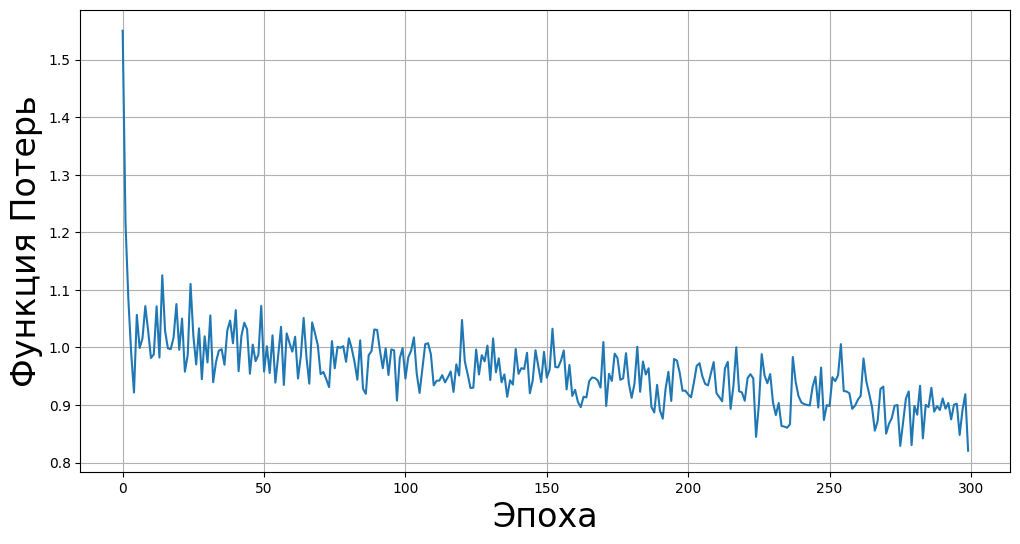

In [ ]:
regr_l1 = LassoRegression(learning_rate=0.1,
                       epochs=300,batch_size=10,
                       l1_penalty = 0.001)
regr_l1.fit(x_train_, y_train)

print(f'Test Score = {regr_l1.score(x_test_, y_test):.2f}, Train Score = {regr_l1.score(x_train_, y_train):.2f}')
regr_l1.plot_cost()